# SEGMENTATION

<div style="align-items: end; width: 100%; display: flex; flex-direction: row; justify-content: center;">
    <p style="text-align: center; width: 20%;"><b>Input video</b></p>
    <p style="text-align: center; width: 20%;"><b>Grid segmentation</b></p>
    <p style="text-align: center; width: 20%;"><b>SLIC segmentation</b></p>
    <p style="text-align: center; width: 20%;"><b>RISE segmentation</b></p>
    <p style="text-align: center; width: 20%;"><b>Optical Flow segmentation</b></p>
</div>

<div style="width: 100%; display: flex; flex-direction: row; justify-content: center;">
    <img style="width: 20%;" src="../resources/gifs/blowing glass.gif"/>
    <img style="width: 20%;" src="../resources/gifs/seg-video-grid-overlay.gif"/>
    <img style="width: 20%;" src="../resources/gifs/seg-video-slic-overlay.gif"/>
    <img style="width: 20%;" src="../resources/gifs/seg-video-rise-overlay.gif"/>
    <img style="width: 20%;" src="../resources/gifs/seg-video-of-grid-overlay.gif"/>
</div>

In [3]:
from revex_framework.segmenters import GridSegmenter, SlicSegmenter, RiseSegmenter, OpticalFlowSegmenter 
from revex_framework.utils import load_video, resize_video, center_crop_video, plot_frames

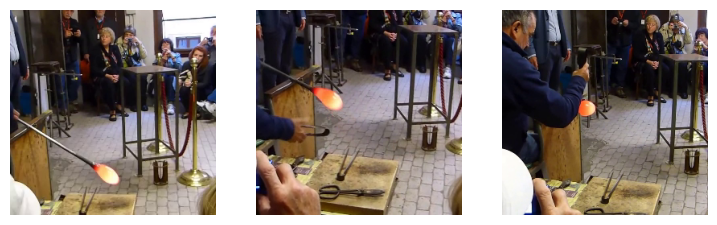

In [26]:
# Load video, rescale and crop
video_path = "../../resources/blowing glass.mp4"
video = load_video(video_path)
scale_factor = 224 / min(video.shape[1:3])
video = resize_video(video, scale_factor, scale_factor)
video = center_crop_video(video, 224)

# Show video
plot_frames(video)

## GRID

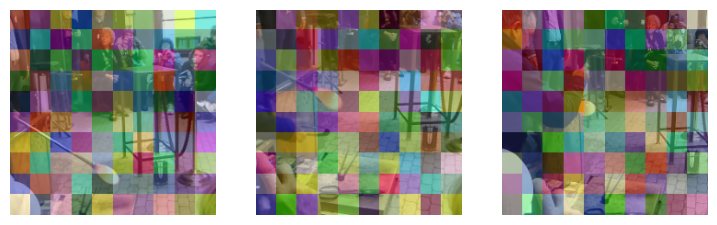

In [17]:
segmenter = GridSegmenter(video)
segments = segmenter.segment(n_seg=[5, 10, 10])
seg_video = segmenter.plot_segments(segments, kind='overlay')
plot_frames(seg_video)

## SLIC

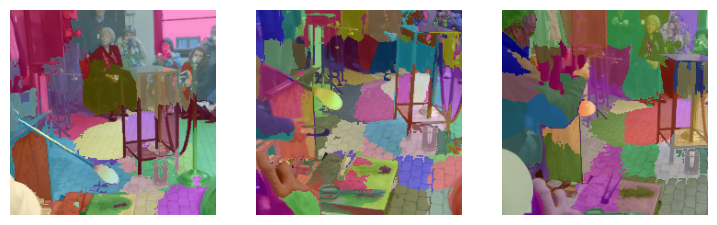

In [18]:
segmenter = SlicSegmenter(video)
segments = segmenter.segment(n_segments=200, compactness=20, spacing=[0.2, 1, 1])
seg_video = segmenter.plot_segments(segments, kind='overlay')
plot_frames(seg_video)

## RISE

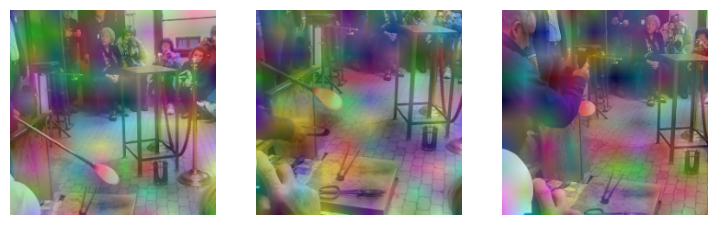

In [19]:
segmenter = RiseSegmenter(video)
segments = segmenter.segment(n_seg=[5, 10, 10])
seg_video = segmenter.plot_segments(segments, kind='overlay')
plot_frames(seg_video)

## OPTICAL FLOW

### GRID on first frame

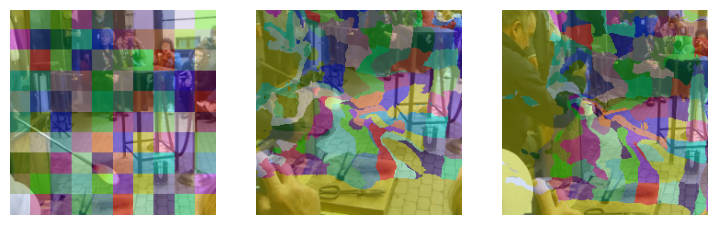

In [ ]:
segmenter = OpticalFlowSegmenter(video)
segments = segmenter.segment(seg_method='grid', of_method='farneback', n_seg=[10, 10])
seg_video = segmenter.plot_segments(segments, kind='overlay')
plot_frames(seg_video)

### SLIC on first frame

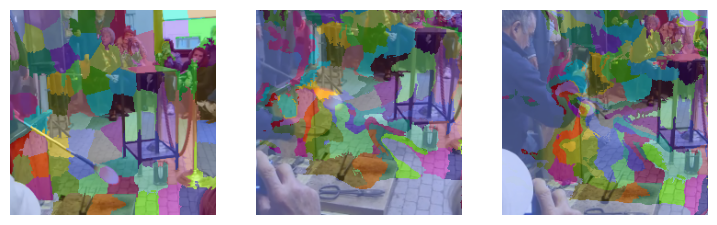

In [20]:
segmenter = OpticalFlowSegmenter(video)
segments = segmenter.segment(seg_method='slic', of_method='farneback', n_segments=100, compactness=20, spacing=[1, 1])
seg_video = segmenter.plot_segments(segments, kind='overlay')
plot_frames(seg_video)

### SLIC and three slices

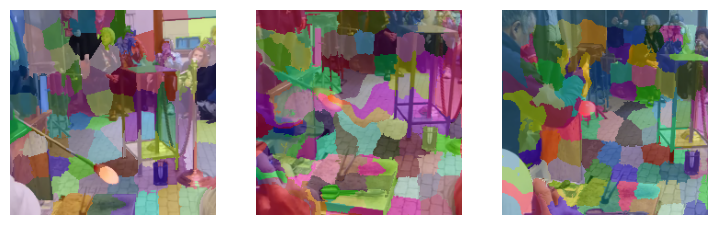

In [22]:
segmenter = OpticalFlowSegmenter(video)
segments = segmenter.segment(n_temp_slices=3, seg_method='slic', of_method='farneback', n_segments=100, compactness=20, spacing=[1, 1])
seg_video = segmenter.plot_segments(segments, kind='overlay')
plot_frames(seg_video)

### GRID and three slices

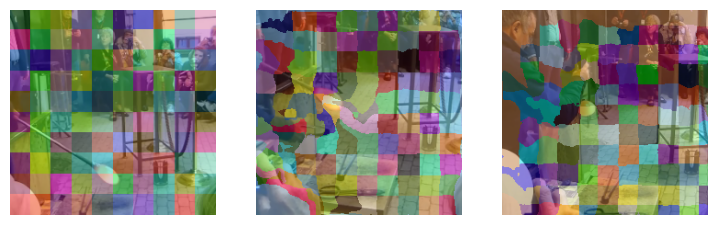

In [23]:
segmenter = OpticalFlowSegmenter(video)
segments = segmenter.segment(n_temp_slices=3, seg_method='grid', of_method='farneback', n_seg=[10, 10])
seg_video = segmenter.plot_segments(segments, kind='overlay')
plot_frames(seg_video)